# Import Libraries

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tkinter import *
import numpy as np
import pandas as pd
import os

# List of Symptoms & Diseases

In [22]:
l1=['back_pain','constipation','abdominal_pain','diarrhoea','mild_fever','yellow_urine',
    'yellowing_of_eyes','acute_liver_failure','fluid_overload','swelling_of_stomach',
    'swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation',
    'redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs',
    'fast_heart_rate','pain_during_bowel_movements','pain_in_anal_region','bloody_stool',
    'irritation_in_anus','neck_pain','dizziness','cramps','bruising','obesity','swollen_legs',
    'swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails',
    'swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips',
    'slurred_speech','knee_pain','hip_joint_pain','muscle_weakness','stiff_neck','swelling_joints',
    'movement_stiffness','spinning_movements','loss_of_balance','unsteadiness',
    'weakness_of_one_body_side','loss_of_smell','bladder_discomfort','foul_smell_of urine',
    'continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)',
    'depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain',
    'abnormal_menstruation','dischromic _patches','watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum',
    'rusty_sputum','lack_of_concentration','visual_disturbances','receiving_blood_transfusion',
    'receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen',
    'history_of_alcohol_consumption','fluid_overload','blood_in_sputum','prominent_veins_on_calf',
    'palpitations','painful_walking','pus_filled_pimples','blackheads','scurring','skin_peeling',
    'silver_like_dusting','small_dents_in_nails','inflammatory_nails','blister','red_sore_around_nose',
    'yellow_crust_ooze']

    

disease=['Fungal infection','Allergy','GERD','Chronic cholestasis','Drug Reaction',
    'Peptic ulcer diseae','AIDS','Diabetes','Gastroenteritis','Bronchial Asthma','Hypertension',
    ' Migraine','Cervical spondylosis',
    'Paralysis (brain hemorrhage)','Jaundice','Malaria','Chicken pox','Dengue','Typhoid','hepatitis A',
    'Hepatitis B','Hepatitis C','Hepatitis D','Hepatitis E','Alcoholic hepatitis','Tuberculosis',
    'Common Cold','Pneumonia','Dimorphic hemmorhoids(piles)',
    'Heartattack','Varicoseveins','Hypothyroidism','Hyperthyroidism','Hypoglycemia','Osteoarthristis',
    'Arthritis','(vertigo) Paroymsal  Positional Vertigo','Acne','Urinary tract infection','Psoriasis',
    'Impetigo']


# Loading Training dataset

In [23]:
df = pd.read_csv("Training_Data.csv")
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


# <span style="color:red">Data Preprocessing ---> Data Cleaning</span>


### Changing column names for better reading

In [24]:
new_columns = [col.replace('_', ' ').title().replace(" "," ") for col in df.columns]
df.columns = new_columns
for name in df.columns:
    print(name, end='\n')

Itching
Skin Rash
Nodal Skin Eruptions
Continuous Sneezing
Shivering
Chills
Joint Pain
Stomach Pain
Acidity
Ulcers On Tongue
Muscle Wasting
Vomiting
Burning Micturition
Spotting  Urination
Fatigue
Weight Gain
Anxiety
Cold Hands And Feets
Mood Swings
Weight Loss
Restlessness
Lethargy
Patches In Throat
Irregular Sugar Level
Cough
High Fever
Sunken Eyes
Breathlessness
Sweating
Dehydration
Indigestion
Headache
Yellowish Skin
Dark Urine
Nausea
Loss Of Appetite
Pain Behind The Eyes
Back Pain
Constipation
Abdominal Pain
Diarrhoea
Mild Fever
Yellow Urine
Yellowing Of Eyes
Acute Liver Failure
Fluid Overload
Swelling Of Stomach
Swelled Lymph Nodes
Malaise
Blurred And Distorted Vision
Phlegm
Throat Irritation
Redness Of Eyes
Sinus Pressure
Runny Nose
Congestion
Chest Pain
Weakness In Limbs
Fast Heart Rate
Pain During Bowel Movements
Pain In Anal Region
Bloody Stool
Irritation In Anus
Neck Pain
Dizziness
Cramps
Bruising
Obesity
Swollen Legs
Swollen Blood Vessels
Puffy Face And Eyes
Enlarged Thyroi

### Refining symptom names in l1

In [25]:
for i in range(len(l1)):
    l1[i] = l1[i].replace("_", " ").title()

### Marking all the disease to Default 0

In [26]:
l2=[]
for i in range(0,len(l1)):
    l2.append(0)
print(l2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Encoding of Diseases

In [27]:
df.replace({'Prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)

### Training Data X_train, y_train

In [28]:
X= df[l1]
y = df[["Prognosis"]]
print(X)


      Back Pain  Constipation  Abdominal Pain  Diarrhoea  Mild Fever  \
0             0             0               0          0           0   
1             0             0               0          0           0   
2             0             0               0          0           0   
3             0             0               0          0           0   
4             0             0               0          0           0   
...         ...           ...             ...        ...         ...   
4915          0             0               0          0           0   
4916          0             0               0          0           0   
4917          0             0               0          0           0   
4918          0             0               0          0           0   
4919          0             0               0          0           0   

      Yellow Urine  Yellowing Of Eyes  Acute Liver Failure  Fluid Overload  \
0                0                  0                    

### Loading testing dataset

In [29]:
te = pd.read_csv("Testing_Data.csv")
new_col = [col.replace('_', ' ').title().replace(" "," ") for col in te.columns]
te.columns = new_col
te.replace({'Prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)


### Testing data X_test, y_test

In [30]:
X_test= te[l1]
y_test = te[["Prognosis"]]

print(X_test)
print(y_test)

    Back Pain  Constipation  Abdominal Pain  Diarrhoea  Mild Fever  \
0           0             0               0          0           0   
1           0             0               0          0           0   
2           0             0               0          0           0   
3           0             0               1          0           0   
4           0             0               0          0           0   
5           0             0               1          0           0   
6           0             0               0          0           0   
7           0             0               0          0           0   
8           0             0               0          1           0   
9           0             0               0          0           0   
10          0             0               0          0           0   
11          0             0               0          0           0   
12          1             0               0          0           0   
13          0       

# <center>--------------------------------Finished Data Preprocessing---------------------------------------</center>

# Function to Plot graph

In [31]:
def scatterplt(disea):
    x = ((DF.loc[disea]).sum())
    x.drop(x[x==0].index,inplace=True)
    print(x.values)
    y = x.keys()
    print(len(x))
    print(len(y))
    plt.title(disea)
    plt.scatter(y,x.values)
    plt.show()

# Function to Scatter the inputs given by the user

In [32]:
def scatterinp(sym1,sym2,sym3,sym4,sym5):
    x = [sym1,sym2,sym3,sym4,sym5]
    y = [0,0,0,0,0] 
    if(sym1!='Select Here'):
        y[0]=1
    if(sym2!='Select Here'):
        y[1]=1
    if(sym3!='Select Here'):
        y[2]=1
    if(sym4!='Select Here'):
        y[3]=1
    if(sym5!='Select Here'):
        y[4]=1
    print(x)
    print(y)
    plt.scatter(x,y)
    plt.show()

# Building Decision Tree Model

In [33]:
import tkinter as tk
def maximize_window(window):
    window.attributes('-fullscreen', True)
root = tk.Tk()


pred1=StringVar()
def DecisionTree():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        print(NameEn.get())
        from sklearn import tree

        clf3 = tree.DecisionTreeClassifier() 
        clf3 = clf3.fit(X,y)

        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=clf3.predict(X_test)
        print("Decision Tree")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)

        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]

        for k in range(0,len(l1)):
            for z in psymptoms:
                if(z==l1[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = clf3.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break

    
        if (h=='yes'):
            pred1.set(" ")
            pred1.set(disease[a])
        else:
            pred1.set(" ")
            pred1.set("Not Found")
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS DecisionTree(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO DecisionTree(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred1.get()))
        conn.commit()  
        c.close() 
        conn.close()
        
        scatterinp(Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get())
        scatterplt(pred1.get())

# Building Random Forest Model

In [34]:
pred2=StringVar()
def randomforest():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.ensemble import RandomForestClassifier
        clf4 = RandomForestClassifier(n_estimators=100)
        clf4 = clf4.fit(X,np.ravel(y))

         
        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=clf4.predict(X_test)
        print("Random Forest")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)
    
        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]

        for k in range(0,len(l1)):
            for z in psymptoms:
                if(z==l1[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = clf4.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break
        if (h=='yes'):
            pred2.set(" ")
            pred2.set(disease[a])
        else:
            pred2.set(" ")
            pred2.set("Not Found")
        
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS RandomForest(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO RandomForest(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred2.get()))
        conn.commit()  
        c.close() 
        conn.close()
       
        scatterplt(pred2.get())

# Building Naive Bayes Classification Model

In [35]:
pred3=StringVar()
def NaiveBayes():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.naive_bayes import GaussianNB
        gnb = GaussianNB()
        gnb=gnb.fit(X,np.ravel(y))

        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=gnb.predict(X_test)
        print("Naive Bayes")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)

        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]
        for k in range(0,len(l1)):
            for z in psymptoms:
                if(z==l1[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = gnb.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break
        if (h=='yes'):
            pred3.set(" ")
            pred3.set(disease[a])
        else:
            pred3.set(" ")
            pred3.set("Not Found")
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS NaiveBayes(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO NaiveBayes(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred3.get()))
        conn.commit()  
        c.close() 
        conn.close()
         
        scatterplt(pred3.get())

# Building KNN Model

In [36]:
pred4=StringVar()
def KNN():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.neighbors import KNeighborsClassifier
        knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
        knn=knn.fit(X,np.ravel(y))
    
        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=knn.predict(X_test)
        print("KNN")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)

        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]

        for k in range(0,len(l1)):
            for z in psymptoms:
                if(z==l1[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = knn.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break


        if (h=='yes'):
            pred4.set(" ")
            pred4.set(disease[a])
        else:
            pred4.set(" ")
            pred4.set("Not Found")
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS KNearestNeighbour(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO KNearestNeighbour(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred4.get()))
        conn.commit()  
        c.close() 
        conn.close()
         
        scatterplt(pred4.get())

# Building GUI --> 

In [37]:
root.configure(background='#2b2b2b')
root.title('Intelligent Disease Diagnosis')
root.resizable(0,0)

Symptom1 = StringVar()
Symptom1.set("Select Here")

Symptom2 = StringVar()
Symptom2.set("Select Here")

Symptom3 = StringVar()
Symptom3.set("Select Here")


Symptom4 = StringVar()
Symptom4.set("Select Here")

Symptom5 = StringVar()
Symptom5.set("Select Here")


# Designing Reset and Exit Button for GUI

In [38]:
prev_win=None
def Reset():
    global prev_win

    Symptom1.set("Select Here")
    Symptom2.set("Select Here")
    Symptom3.set("Select Here")
    Symptom4.set("Select Here")
    Symptom5.set("Select Here")
    
    NameEn.delete(first=0,last=100)
    
    pred1.set(" ")
    pred2.set(" ")
    pred3.set(" ")
    pred4.set(" ")
    try:
        prev_win.destroy()
        prev_win=None
    except AttributeError:
        pass
    

from tkinter import messagebox
def Exit():
    qExit=messagebox.askyesno("System","Do you want to exit the system")
    if qExit:
        root.destroy()
        exit()
        

w2 = Label(root, justify=CENTER, text="Disease Predictor using Machine Learning", fg="White", bg="#2b2b2b")
w2.config(font=("Georgia", 30, "bold italic"))
w2.grid(row=1, column=0, columnspan=2, padx=100, pady=30, sticky="nsew")



# Taking User Input

In [39]:
Name = StringVar()
NameLb = Label(root, text="Name of the Patient", fg="White", bg="#2b2b2b")
NameLb.config(font=("Georgia", 20, "bold italic"))
NameLb.grid(row=6, column=0, padx=100, pady=10, sticky=W)


S1Lb = Label(root, text="Symptom 1", fg="White", bg="#2b2b2b")
S1Lb.config(font=("Georgia", 15, "bold italic"))
S1Lb.grid(row=7, column=0, padx=100, pady=10, sticky=W)

S2Lb = Label(root, text="Symptom 2", fg="White", bg="#2b2b2b")
S2Lb.config(font=("Georgia", 15, "bold italic"))
S2Lb.grid(row=7, column=1,pady=10, sticky=W)

S3Lb = Label(root, text="Symptom 3", fg="White", bg="#2b2b2b")
S3Lb.config(font=("Georgia", 15, "bold italic"))
S3Lb.grid(row=9, column=0,padx=100, pady=10, sticky=W)

S4Lb = Label(root, text="Symptom 4", fg="White", bg="#2b2b2b")
S4Lb.config(font=("Georgia", 15, "bold italic"))
S4Lb.grid(row=9, column=1, pady=10, sticky=W)

S5Lb = Label(root, text="Symptom 5", fg="White", bg="#2b2b2b")
S5Lb.config(font=("Georgia", 15, "bold italic"))
S5Lb.grid(row=11, column=0,padx=100, pady=10, sticky=W)


OPTIONS = sorted(l1)

#Taking name as input from user
NameEn = Entry(root, textvariable=Name,font=("Georgia", 15))
NameEn.grid(row=6, column=1, sticky=W)


S1 = OptionMenu(root, Symptom1,*OPTIONS)
S1.grid(row=8, column=0, padx=100, pady=10,sticky=W)

S2 = OptionMenu(root, Symptom2,*OPTIONS)
S2.grid(row=8, column=1,sticky=W)

S3 = OptionMenu(root, Symptom3,*OPTIONS)
S3.grid(row=10, column=0,padx=100, pady=10,sticky=W)

S4 = OptionMenu(root, Symptom4,*OPTIONS)
S4.grid(row=10, column=1,sticky=W)

S5 = OptionMenu(root, Symptom5,*OPTIONS)
S5.grid(row=12, column=0, padx=100, pady=(10, 30), sticky=W)

# Designing Buttons to Predict using different models.

s
Decision Tree
Accuracy
0.9285714285714286
39.0
Confusion matrix
[[1 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
['Coma', 'Constipation', 'Cramps', 'Chest Pain', 'Select Here']
[1, 1, 1, 1, 0]


C:\Users\shivam sharma\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


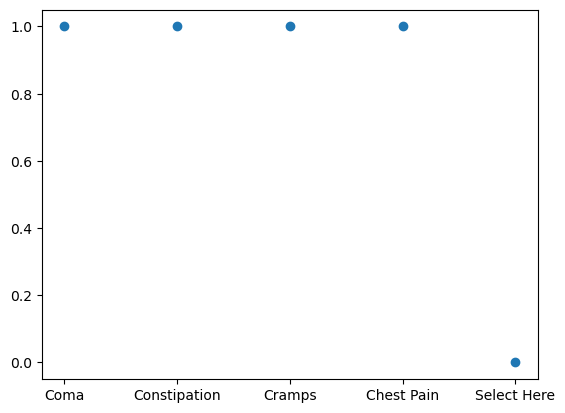

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\shivam sharma\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\shivam sharma\AppData\Local\Temp\ipykernel_32104\33462521.py", line 70, in DecisionTree
    scatterplt(pred1.get())
  File "C:\Users\shivam sharma\AppData\Local\Temp\ipykernel_32104\1476950103.py", line 2, in scatterplt
    x = ((DF.loc[disea]).sum())
NameError: name 'DF' is not defined


Random Forest
Accuracy
0.9285714285714286
39.0
Confusion matrix
[[1 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


C:\Users\shivam sharma\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\shivam sharma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shivam sharma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shivam sharma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and bei

Naive Bayes
Accuracy
0.9285714285714286
39.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


C:\Users\shivam sharma\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\shivam sharma\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\shivam sharma\AppData\Local\Temp\ipykernel_32104\1477483545.py", line 58, in NaiveBayes
    scatterplt(pred3.get())
  File "C:\Users\shivam sharma\AppData\Local\Temp\ipykernel_32104\1476950103.py", line 2, in scatterplt
    x = ((DF.loc[disea]).sum())
NameError: name 'DF' is not defined


KNN
Accuracy
0.9285714285714286
39.0
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


C:\Users\shivam sharma\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\shivam sharma\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\shivam sharma\AppData\Local\Temp\ipykernel_32104\1971817535.py", line 61, in KNN
    scatterplt(pred4.get())
  File "C:\Users\shivam sharma\AppData\Local\Temp\ipykernel_32104\1476950103.py", line 2, in scatterplt
    x = ((DF.loc[disea]).sum())
NameError: name 'DF' is not defined


In [40]:
dst = Button(root, text="Decision Tree Prediction", command=DecisionTree,bg="#008000",fg="white", height=1, width=20)
dst.config(font=("Times",15,"bold italic"))
dst.grid(row=15, column=0, padx=100, pady=5, sticky=W)

rnf = Button(root, text="Random Forest Prediction", command=randomforest,bg="#008000",fg="white", height=1, width=20)
rnf.config(font=("Times",15,"bold italic"))
rnf.grid(row=17, column=0,padx=100, pady=5,sticky=W)

lr = Button(root, text="Naive Bayes Prediction", command=NaiveBayes,bg="#008000",fg="white", height=1,width=20)
lr.config(font=("Times",15,"bold italic"))
lr.grid(row=19, column=0,padx=100,pady=5,sticky=W)

kn = Button(root, text="KNN Prediction", command=KNN,bg="#008000",fg="white", height=1,width=20)
kn.config(font=("Times",15,"bold italic"))
kn.grid(row=21, column=0,padx=100,pady=(5,25),sticky=W)

rs = Button(root,text="Reset Inputs", command=Reset,bg="#FFA500",fg="White",width=10)
rs.config(font=("Georgia",14,"bold italic"))
rs.grid(row=12,column=1, pady=(10, 30), sticky=W )

ex = Button(root,text="Exit", command=Exit,bg="Red",fg="White",width=8)
ex.config(font=("Georgia",10,"bold italic"))
ex.grid(row=1,column=3,padx=(0,30))

t1=Label(root,font=("Times",15,"bold italic"),text="Decision Tree",height=1,bg="white"
         ,width=40,fg="Black",textvariable=pred1,relief="ridge", borderwidth=3).grid(row=15, column=1,pady=5,sticky=W)

t2=Label(root,font=("Times",15,"bold italic"),text="Random Forest",height=1,bg="White"
         ,width=40,fg="Black",textvariable=pred2,relief="ridge", borderwidth=3).grid(row=17, column=1, pady=5,sticky=W)

t3=Label(root,font=("Times",15,"bold italic"),text="Naive Bayes",height=1,bg="white"
         ,width=40,fg="Black",textvariable=pred3,relief="ridge", borderwidth=3).grid(row=19, column=1,pady=5,sticky=W)

t4=Label(root,font=("Times",15,"bold italic"),text="kNearest Neighbour",height=1,bg="white"
         ,width=40,fg="Black",textvariable=pred4, relief="ridge", borderwidth=3).grid(row=21, column=1, pady=(5, 25),sticky=W)


root.mainloop()
